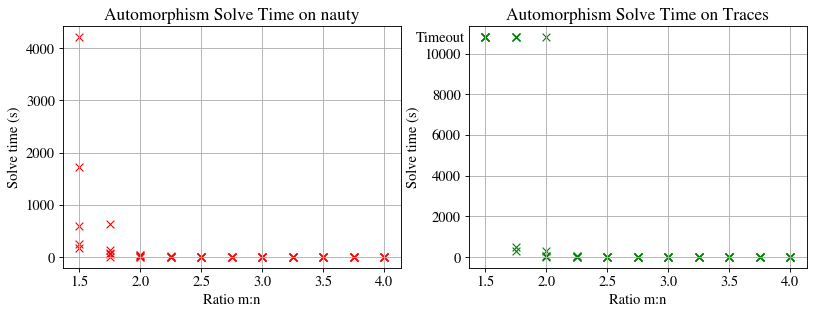

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['lines.markersize'] = 7
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rcParams['figure.dpi'] = 80
matplotlib.rcParams['axes.grid'] = 'true'

def clean_time(s):
    s = s.replace("cpu time = ", "")
    s = s.replace(" seconds\n", "")
    return float(s)

def clean_ratio(s):
    return float(s[-6:-1])

def clean_label(s):
    return s[:-1]

labels = []
ratios = []
nauty_times = []
traces_times = []

INF = 3 * 3600

f = open("data/ratio_summary.txt", "r")
l = f.readlines()

i = 0
while i < len(l):
    if not(l[i].startswith("cpu time = ")):
        labels.append(clean_label(l[i]))
        ratios.append(clean_ratio(l[i]))
        nauty_times.append(INF)
        traces_times.append(INF)
    elif not(l[i-1].startswith("cpu time = ")):
        nauty_times[-1] = clean_time(l[i])
    else:
        traces_times[-1] = clean_time(l[i])
    i += 1
    
fig = plt.figure(num=None, figsize=(12, 4))
ax = fig.add_subplot(121)

ax.scatter(ratios, nauty_times, c="r", marker="x")
ax.set_title("Automorphism Solve Time on nauty")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Ratio m:n")

# try (7.5, 5) for small
# plt.figure(num=None, figsize=(5, 4))
ax = fig.add_subplot(122)
        
plt.scatter(ratios, traces_times, c="g", marker="x")
ax.set_title("Automorphism Solve Time on Traces")
ax.set_ylabel("Solve time (s)")
ax.set_xlabel("Ratio m:n")
ax.text(-0.01, 0.925, "Timeout",
       verticalalignment='bottom', horizontalalignment='right',
       transform=ax.transAxes, fontsize=13)
plt.show()

fig.savefig("exports/ratio_vs_time.pdf", bbox_inches='tight')